# Transformación de Datos con Scikit-Learn

Vamos a mostrar algunas funcionalidades de Transformación de Datos con Scikit-Learn con algunos ejemplos sobre el dataset de Titanic, de la misma manera que hicimos con Pandas.

Primero importamos las librerías y cargamos el dataset

Cargamos las librerías y los datos

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
### Carga de datos
df = pd.read_csv('ds_encuentro_titanic.csv')
print(df.shape)
df.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Imputación de valores faltantes con Scikit-Learn

Una cosa para tener en cuenta es que a Scikit-Learn no le gustan los valores faltantes, por lo que una de las primeras cosas que tendremos que hacer es imputarlos. En el módulo `sklearn.impute`, del cual recomendamos mirar su [documentación](https://scikit-learn.org/stable/modules/impute.html#impute), pueden encontrar algunas clases útiles para esta tarea.

El imputador más sencillo es el `SimpleImputer`, el cual nos servirá para rellenar valores faltantes en las columnas que elijamos. Mirar el siguiente ejemplo y explorar cuáles son los parámetros de ese objeto.

In [5]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

In [6]:
edades = df.Age.values
imp.fit(edades.reshape(-1,1))
print(imp.statistics_)

[29.69911765]


In [7]:
edades_imputed = imp.transform(edades.reshape(-1,1))
print(edades_imputed[:10])

[[22.        ]
 [38.        ]
 [26.        ]
 [35.        ]
 [35.        ]
 [29.69911765]
 [54.        ]
 [ 2.        ]
 [27.        ]
 [14.        ]]


Y, si queremos agregarlas al DataFrame,

In [8]:
df['Age_imputed'] = edades_imputed
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.000000


### Discretización y binning con Scikit-Learn

La principal diferencia entre Scikit-Learn y Pandas es que Scikit-Learn decide los límites de los bines de acuerdo a una estrategia que le pasemos. La clase que vamos a usar se llama `KBinsDiscretizer`.

In [9]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy = 'uniform')

Separamos los valores que queremos fitear.

In [10]:
edades = df.Age_imputed.values
print(edades.reshape(-1,1).shape)

(891, 1)


Y fiteamos el estimador

In [11]:
est.fit(edades.reshape(-1,1))

KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='uniform')

Miramos los límites de cada bin

In [12]:
est.bin_edges_

array([array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ])],
      dtype=object)

In [13]:
bines_asignados = est.transform(edades.reshape(-1,1))
print(bines_asignados)

[[1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [3.]
 [0.]
 [1.]
 [0.]
 [0.]
 [3.]
 [1.]
 [2.]
 [0.]
 [3.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [4.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [0.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [3.]
 [1.]
 [4.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [3.]
 [1.]
 [4.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [4.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [3.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [3.]
 [1.]
 [3.]
 [2.]
 [1.]
 [3.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.

Y agregamos al dataframe

In [14]:
df['rangos_etarios_scikit'] = bines_asignados
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed,rangos_etarios_scikit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1.0


Se puede hacer en una sola línea con `.fit_transform`

In [15]:
df['rangos_etarios_scikit'] = est.fit_transform(edades.reshape(-1,1))
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed,rangos_etarios_scikit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,2.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000,3.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.000000,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.000000,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.000000,0.0


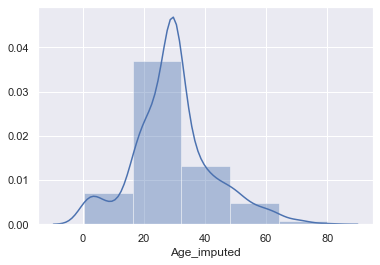

In [16]:
sns.distplot(df.Age_imputed, bins=est.bin_edges_[0])


¿Cuáles son las estrategias posibles del `KBinsDiscretizer`?¿Qué formas tiene de *encodear* la salida?

### `OneHotEncoder`

El caballito de batalla es el `OneHotEncoder`.

In [17]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse = False)

In [18]:
generos = df.Sex.values.reshape(-1,1)
print(np.unique(generos))

['female' 'male']


In [19]:
onehot_encoder.fit(generos)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [20]:
onehot_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [21]:
generos_encoded = onehot_encoder.transform(generos)
print(generos_encoded)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [22]:
onehot_encoder.inverse_transform(generos_encoded[500].reshape(1,-1))

array([['male']], dtype=object)

In [23]:
df['female_encoded'] = generos_encoded[:,0]
df['male_encoded'] = generos_encoded[:,1]
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed,rangos_etarios_scikit,female_encoded,male_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,2.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,1.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,2.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,2.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118,1.0,0.0,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000,3.0,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.000000,0.0,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.000000,1.0,1.0,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.000000,0.0,1.0,0.0


### Ejercitación

Tomar el dataset 'DS_Clase_10_Heart.csv' y hacer la transformación de datos que hicieron con Pandas, pero ahora con Scikit-Learn. Transformar la columna `sex` con una `LabelEncoder` y la columna `thal` con un `OneHotEncoder`.

In [25]:
### Carga de datos
df1 = pd.read_csv('DS_Encuentro_10_Heart.csv')
print(df1.shape)
df1.head(5)

(180, 15)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0


In [26]:
# primero verificamos si hay valores nulos
df1.isnull().sum() # valores faltantes por columna

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

generos1 = df1.sex.values
print(np.unique(generos1))

['female' 'male']


In [31]:
le.fit(generos1)

LabelEncoder()

In [33]:
generos_encoded1 = le.transform(generos1)
print(generos_encoded1)

[1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0]


In [38]:
generos_encoded1[2]

1

In [39]:
df1['Sex_encoded'] = generos_encoded1

In [40]:
df1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,Sex_encoded
0,0z64un,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0,1
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0,1


In [45]:
# ahora vamos a encodear la columna Thal con un one hot encoder

efects = df1.thal.values.reshape(-1,1)
print(np.unique(efects))  # vamos a ver los valore != de la variable

['fixed_defect' 'normal' 'reversible_defect']


In [46]:
onehot_encoder.fit(efects)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [47]:
onehot_encoder.fit(efects)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [48]:
onehot_encoder.categories_

[array(['fixed_defect', 'normal', 'reversible_defect'], dtype=object)]

In [49]:
efects_encoded = onehot_encoder.transform(efects)
print(efects_encoded)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0.

In [50]:
df1['fixed_defect'] = efects_encoded[:,0]
df1['normal'] = efects_encoded[:,1]
df1['reversible_defect'] = efects_encoded[:,2]
df1.head(10)

ValueError: Length of values does not match length of index